This notebook contains code for:
1. Importing exracted acoustic measurements for each speaker and dropping measurements for non-vowels
2. Importing categorical data for each word for each language
3. Merging the acoustic measurement dataframes for each language with the categorical dataframes by word and vowel
4. Joining the dataframes for all speakers into a single dataframe


## Import tools

In [485]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Import data for each Nepali speaker
This is done tediously one by one because I created the data myself and want to examine each one as it is imported to make sure it does not need to be re-generated from the original sound files. Also I had a ton of trouble with unicode/special characters and wanted to make sure each .csv would not throw errors.

In [195]:
## Speaker 1
df_s1 = pd.read_csv('Speaker_1_formants.csv')
df_s1.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Nepali,1,3.965554,NaN,NaN,7.931109,589.399713,1688.656918,2297.467800
1,Nepali,1,8.091925,one,NaN,0.321634,1046.062443,2011.958328,3118.858833
2,Nepali,1,8.422885,one,e,0.340285,570.820088,2773.608460,3421.056785
3,Nepali,1,9.102756,one,NaN,1.019458,684.089600,1684.315213,2548.797453
4,Nepali,1,9.794364,one,e,0.363759,555.260091,2818.847185,3332.194967


In [196]:
df_s1.shape

(1151, 9)

In [197]:
## Drop measurements for segments in audio recording without vowels
df_s1.dropna(subset = ['phoneme'], inplace = True)
df_s1.shape

(480, 9)

In [198]:
df_s1.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
2,Nepali,1,8.422885,one,e,0.340285,570.820088,2773.608460,3421.056785
4,Nepali,1,9.794364,one,e,0.363759,555.260091,2818.847185,3332.194967
6,Nepali,1,10.912042,one,e,0.179386,522.733404,2736.485673,3301.971337
12,Nepali,1,20.259035,two,i,0.365618,449.909150,2762.010722,3349.317399
14,Nepali,1,21.365301,two,i,0.360141,388.329390,2799.204021,3345.667876


In [493]:
df_s1.word.value_counts()

chili pepper    9
yellow          9
ginger          9
month           9
wife            9
               ..
taste           3
fox             3
work            3
envelope        3
one             3
Name: word, Length: 92, dtype: int64

In [199]:
## Speaker 2
df_s2 = pd.read_csv('Speaker_2_formants.csv')
df_s2.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Nepali,2,5.346937,NaN,NaN,10.693874,513.532588,1333.197579,2578.391424
1,Nepali,2,10.812241,one,NaN,0.236734,1084.185965,2011.281189,3204.299121
2,Nepali,2,11.088200,one,e,0.315184,378.943600,2364.986485,3139.028199
3,Nepali,2,11.927282,one,NaN,1.362982,638.368379,1996.511398,2607.077932
4,Nepali,2,12.791580,one,e,0.365613,394.764828,2405.578834,2859.784363


In [200]:
df_s2.shape

(1178, 9)

In [201]:
## Drop measurements for segments in audio recording without vowels
df_s2.dropna(subset = ['phoneme'], inplace = True)
df_s2.shape

(495, 9)

In [202]:
df_s2.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
2,Nepali,2,11.088200,one,e,0.315184,378.943600,2364.986485,3139.028199
4,Nepali,2,12.791580,one,e,0.365613,394.764828,2405.578834,2859.784363
6,Nepali,2,14.566704,one,e,0.342920,383.271851,2382.633017,2491.770842
12,Nepali,2,27.031614,three,i,0.267276,266.704871,2540.056659,3234.222547
14,Nepali,2,28.638841,three,i,0.272319,268.265413,2504.437823,3334.063158


In [494]:
df_s2.word.value_counts()

month             18
younger sister    18
quickly           12
ginger             9
slowly             9
                  ..
that               3
three              3
taste              3
oil                3
nine               2
Name: word, Length: 91, dtype: int64

In [203]:
## Speaker 3
df_s3 = pd.read_csv('Speaker_3_formants.csv')
df_s3.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Nepali,3,1.717565,NaN,NaN,3.435129,654.355751,2150.225685,2761.230861
1,Nepali,3,3.765051,one,NaN,0.659843,555.892361,1897.012402,2965.983413
2,Nepali,3,4.216289,one,e,0.242634,488.100861,2365.149865,2906.287134
3,Nepali,3,4.965977,one,NaN,1.256741,850.291708,1814.614983,2869.995553
4,Nepali,3,5.730222,one,e,0.271750,473.666111,2357.081970,3078.175020


In [204]:
df_s3.shape

(1190, 9)

In [495]:
df_s3.word.value_counts()

chili pepper      9
slowly            9
younger sister    9
yellow            9
month             9
                 ..
this              3
that              3
two               3
taste             3
oil               3
Name: word, Length: 92, dtype: int64

In [205]:
## Drop measurements for segments in audio recording without vowels
df_s3.dropna(subset = ['phoneme'], inplace = True)
df_s3.shape

(477, 9)

In [206]:
df_s3.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
2,Nepali,3,4.216289,one,e,0.242634,488.100861,2365.149865,2906.287134
4,Nepali,3,5.730222,one,e,0.271750,473.666111,2357.081970,3078.175020
6,Nepali,3,7.307779,one,e,0.266897,451.264879,2343.619835,2917.138171
10,Nepali,3,15.157088,two,i,0.308145,296.847215,551.981154,2519.486673
12,Nepali,3,16.839636,two,i,0.247487,327.263186,2516.067857,3131.597392


In [496]:
df_s3.word.value_counts()

chili pepper      9
slowly            9
younger sister    9
yellow            9
month             9
                 ..
this              3
that              3
two               3
taste             3
oil               3
Name: word, Length: 92, dtype: int64

In [227]:
## Speaker 4
df_s4 = pd.read_csv('Speaker_4_formants.csv')
df_s4.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Nepali,4,2.140026,NaN,NaN,4.280051,787.184298,1641.905423,2520.105837
1,Nepali,4,4.435629,one,NaN,0.311157,1209.032056,2138.204054,3103.768691
2,Nepali,4,4.650874,one,e,0.119332,416.338252,1707.116383,2737.004113
3,Nepali,4,5.315487,one,NaN,1.209894,1230.101540,1926.958634,3173.339523
4,Nepali,4,6.026507,one,e,0.212146,410.793153,1610.760572,2741.113118


In [228]:
df_s4.shape

(1169, 9)

In [229]:
## Drop measurements for segments in audio recording without vowels
df_s4.dropna(subset = ['phoneme'], inplace = True)
df_s4.shape

(468, 9)

In [230]:
df_s4.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
2,Nepali,4,4.650874,one,e,0.119332,416.338252,1707.116383,2737.004113
4,Nepali,4,6.026507,one,e,0.212146,410.793153,1610.760572,2741.113118
6,Nepali,4,7.315867,one,e,0.235349,392.331199,1646.204720,2752.640811
10,Nepali,4,10.018841,two,i,0.165739,346.272901,2664.470337,3442.486299
12,Nepali,4,11.464085,two,i,0.198887,357.585638,2655.552142,3327.841801


In [497]:
df_s4.word.value_counts()

ginger    9
slowly    9
wife      9
yellow    9
month     9
         ..
this      3
two       3
taste     3
oil       3
that      2
Name: word, Length: 92, dtype: int64

In [231]:
## Speaker 5
df_s5 = pd.read_csv('Speaker_5_formants.csv')
df_s5.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Nepali,5,1.365514,NaN,NaN,2.731027,762.830502,1733.173427,2761.621848
1,Nepali,5,4.667307,one of them,NaN,3.872560,494.499457,1161.175427,2983.488343
2,Nepali,5,7.219676,NaN,NaN,1.232178,440.039611,1608.953994,2745.763500
3,Nepali,5,9.807250,five of them,NaN,3.942970,478.481404,1398.218775,2931.709080
4,Nepali,5,12.518041,NaN,NaN,1.478614,1603.785349,2206.143575,3317.409360


In [232]:
df_s5.shape

(1381, 9)

In [233]:
## Drop measurements for segments in audio recording without vowels
df_s5.dropna(subset = ['phoneme'], inplace = True)
df_s5.shape

(470, 9)

In [234]:
df_s5.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
220,Nepali,5,1198.791152,one,e,0.187772,493.444705,2404.683425,3065.845678
222,Nepali,5,1200.969274,one,e,0.240348,405.154276,2560.121537,2904.948885
224,Nepali,5,1202.152234,one,e,0.217815,477.951592,2396.953266,3003.706543
228,Nepali,5,1207.395033,two,i,0.255369,245.536632,1357.514197,2631.648437
230,Nepali,5,1208.813074,two,i,0.244103,260.965263,2644.962906,3148.823658


In [498]:
df_s5.word.value_counts()

tomato            12
younger sister     9
month              9
chili pepper       9
ginger             9
                  ..
two                3
taste              3
floor              2
leaf               2
six                1
Name: word, Length: 92, dtype: int64

## Append data from Nepali speakers into one df, then merge with categorical data

In [235]:
df = df_s1.append([df_s2, df_s3, df_s4, df_s5], ignore_index=True)
df.shape

(2390, 9)

In [236]:
df.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Nepali,1,8.422885,one,e,0.340285,570.820088,2773.608460,3421.056785
1,Nepali,1,9.794364,one,e,0.363759,555.260091,2818.847185,3332.194967
2,Nepali,1,10.912042,one,e,0.179386,522.733404,2736.485673,3301.971337
3,Nepali,1,20.259035,two,i,0.365618,449.909150,2762.010722,3349.317399
4,Nepali,1,21.365301,two,i,0.360141,388.329390,2799.204021,3345.667876


In [237]:
df.tail()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
2385,Nepali,5,608.424822,flower,u,0.211269,356.284561,866.571008,2794.020933
2386,Nepali,5,609.729947,flower,u,0.224536,373.565456,953.899057,3066.787347
2387,Nepali,5,636.892131,oil,e,0.171180,400.185623,2324.433727,2495.931685
2388,Nepali,5,638.554822,oil,e,0.198352,392.904317,2396.781330,2984.468348
2389,Nepali,5,640.140700,oil,e,0.241826,398.854867,2416.996534,3032.377880


In [238]:
df_nep = pd.read_csv('Nepali_elicitation.csv')
df_nep.head()

,word,phoneme,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda
0,one,e,0,1,none,none,0,1
1,two,i,0,1,labial,sonorant,0,1
2,three,i,0,1,coronal,obstruent,0,1
3,four,aa,0,1,coronal,obstruent,0,1
4,five,aa,1,1,labial,obstruent,0,1


In [239]:
df_merged = pd.merge(df, df_nep, on=['word', 'phoneme'], how='left')

In [240]:
df_merged.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda
0,Nepali,1,8.422885,one,e,0.340285,570.820088,2773.608460,3421.056785,0,1,none,none,0,1
1,Nepali,1,9.794364,one,e,0.363759,555.260091,2818.847185,3332.194967,0,1,none,none,0,1
2,Nepali,1,10.912042,one,e,0.179386,522.733404,2736.485673,3301.971337,0,1,none,none,0,1
3,Nepali,1,20.259035,two,i,0.365618,449.909150,2762.010722,3349.317399,0,1,labial,sonorant,0,1
4,Nepali,1,21.365301,two,i,0.360141,388.329390,2799.204021,3345.667876,0,1,labial,sonorant,0,1


In [241]:
df_merged.tail()

,language,speaker,time,word,phoneme,duration,F1,F2,F3,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda
2781,Nepali,5,608.424822,flower,u,0.211269,356.284561,866.571008,2794.020933,0,1,labial,obstruent,1,1
2782,Nepali,5,609.729947,flower,u,0.224536,373.565456,953.899057,3066.787347,0,1,labial,obstruent,1,1
2783,Nepali,5,636.892131,oil,e,0.171180,400.185623,2324.433727,2495.931685,0,1,coronal,obstruent,0,1
2784,Nepali,5,638.554822,oil,e,0.198352,392.904317,2396.781330,2984.468348,0,1,coronal,obstruent,0,1
2785,Nepali,5,640.140700,oil,e,0.241826,398.854867,2416.996534,3032.377880,0,1,coronal,obstruent,0,1


In [242]:
df_merged.shape

(2786, 15)

In [243]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 2785
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   language         2786 non-null   object 
 1   speaker          2786 non-null   int64  
 2   time             2786 non-null   float64
 3   word             2786 non-null   object 
 4   phoneme          2786 non-null   object 
 5   duration         2786 non-null   float64
 6   F1               2786 non-null   float64
 7   F2               2786 non-null   float64
 8   F3               2786 non-null   float64
 9   nasal            2786 non-null   int64  
 10  syllable_number  2786 non-null   int64  
 11  onset_c_place    2786 non-null   object 
 12  onset_c_manner   2786 non-null   object 
 13  laryngeal        2786 non-null   int64  
 14  coda             2786 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 348.2+ KB


In [244]:
df_merged.drop_duplicates(inplace = True)
df_merged.shape

(2786, 15)

In [248]:
df_merged[df_merged.speaker == 1]

,language,speaker,time,word,phoneme,duration,F1,F2,F3,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda
0,Nepali,1,8.422885,one,e,0.340285,570.820088,2773.608460,3421.056785,0,1,none,none,0,1
1,Nepali,1,9.794364,one,e,0.363759,555.260091,2818.847185,3332.194967,0,1,none,none,0,1
2,Nepali,1,10.912042,one,e,0.179386,522.733404,2736.485673,3301.971337,0,1,none,none,0,1
3,Nepali,1,20.259035,two,i,0.365618,449.909150,2762.010722,3349.317399,0,1,labial,sonorant,0,1
4,Nepali,1,21.365301,two,i,0.360141,388.329390,2799.204021,3345.667876,0,1,labial,sonorant,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,Nepali,1,1126.752469,puja,aa,0.277118,835.034702,1811.066232,1821.244593,0,2,coronal,obstruent,0,0
560,Nepali,1,1127.400177,puja,u,0.116949,408.123581,1357.884107,3118.781935,0,1,labial,obstruent,0,0
561,Nepali,1,1127.691627,puja,aa,0.269491,888.064875,1716.190390,2139.958939,0,2,coronal,obstruent,0,0
562,Nepali,1,1128.337241,puja,u,0.099152,399.839481,1704.072759,3187.590633,0,1,labial,obstruent,0,0


In [252]:
df_merged[df_merged.coda.isna()]

,language,speaker,time,word,phoneme,duration,F1,F2,F3,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda


## Import data for each Gurung speaker

In [413]:
## Speaker 6
df_s6 = pd.read_csv('Speaker_6_formants.csv')
df_s6.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Gurung,6,20.259752,NaN,NaN,40.519504,440.930692,1627.967453,1942.110020
1,Gurung,6,40.745567,head,NaN,0.452125,812.185186,1405.951269,3067.150521
2,Gurung,6,41.155646,head,a,0.368032,770.982495,1268.536280,2746.119804
3,Gurung,6,41.490835,head,NaN,0.302347,1498.736459,2145.554501,3309.650257
4,Gurung,6,41.842289,head,a,0.400561,677.215935,1188.185737,2726.869441


In [414]:
df_s6.shape

(1127, 9)

In [415]:
## Drop measurements for segments in audio recording without vowels
df_s6.dropna(subset = ['phoneme'], inplace = True)
df_s6.shape

(440, 9)

In [499]:
df_s6.word.value_counts()

feces       9
twilight    9
stone       6
many        6
ash         6
           ..
dust        3
soil        3
smoke       3
fire        3
to steal    3
Name: word, Length: 111, dtype: int64

In [416]:
## Speaker 7
df_s7 = pd.read_csv('Speaker_7_formants.csv')
df_s7.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Gurung,7,0.147516,head,NaN,0.295032,730.283995,1427.155913,2672.057185
1,Gurung,7,0.489994,head,a,0.389925,883.036786,1682.508450,2961.549622
2,Gurung,7,0.896699,head,NaN,0.423484,1433.425199,1695.628465,2859.550383
3,Gurung,7,1.248167,head,a,0.279451,730.580921,1441.031051,2635.825354
4,Gurung,7,1.507897,head,NaN,0.240008,581.046426,1709.933016,2880.612569


In [417]:
df_s7.shape

(1130, 9)

In [418]:
## Drop measurements for segments in audio recording without vowels
df_s7.dropna(subset = ['phoneme'], inplace = True)
df_s7.shape

(417, 9)

In [500]:
df_s7.word.value_counts()

here           14
grandmother    12
many            9
grandfather     8
yesterday       8
               ..
hair            2
fat             2
name            2
place           2
chicken egg     1
Name: word, Length: 83, dtype: int64

In [419]:
## Speaker 8
df_s8 = pd.read_csv('Speaker_8_formants.csv')
df_s8.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Gurung,8,0.198289,NaN,NaN,0.396578,760.629076,1926.647203,3046.384388
1,Gurung,8,0.747320,daytime NEP,NaN,0.701485,377.673702,939.682255,2359.536221
2,Gurung,8,1.098364,afternoon,NaN,0.000602,284.768135,1945.572911,2298.448700
3,Gurung,8,1.139944,afternoon,NaN,0.082559,405.418863,1609.417794,2705.725445
4,Gurung,8,1.289949,afternoon,i,0.217451,352.369361,943.468633,2824.894014


In [420]:
df_s8.shape

(926, 9)

In [421]:
## Drop measurements for segments in audio recording without vowels
df_s8.dropna(subset = ['phoneme'], inplace = True)
df_s8.shape

(354, 9)

In [501]:
df_s8.word.value_counts()

grandmother      9
chicken egg      9
tree             8
buffalo          8
snake            8
                ..
thread           2
unhusked rice    2
head             2
hand             2
axe              1
Name: word, Length: 78, dtype: int64

In [438]:
## Speaker 9
df_s9 = pd.read_csv('Speaker_9_formants.csv')
df_s9.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Gurung,9,21.229534,NaN,NaN,42.459067,989.086788,1959.712102,2931.470425
1,Gurung,9,42.920250,head,NaN,0.922366,449.285173,1389.040851,2071.655092
2,Gurung,9,43.554371,head,a,0.345875,638.915461,1173.345858,2400.069217
3,Gurung,9,43.989425,head,NaN,0.524234,1024.323942,2115.162152,2867.924341
4,Gurung,9,44.436407,head,a,0.369728,680.821288,1201.892219,2474.507967


In [439]:
df_s9.shape

(1061, 9)

In [440]:
## Drop measurements for segments in audio recording without vowels
df_s9.dropna(subset = ['phoneme'], inplace = True)
df_s9.shape

(418, 9)

In [502]:
df_s9.word.value_counts()

here        12
charcoal     9
red          6
this         6
raining      6
            ..
smoke        3
fire         3
road         3
field        3
to steal     3
Name: word, Length: 103, dtype: int64

In [441]:
## Speaker 10
df_s10 = pd.read_csv('Speaker_10_formants.csv')
df_s10.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Gurung,10,8.971605,NaN,NaN,17.943210,350.632518,1554.452815,2622.997338
1,Gurung,10,17.954845,head,NaN,0.023271,824.087860,1375.648975,2190.651286
2,Gurung,10,17.991843,head,NaN,0.050725,592.668765,1435.315733,2575.048161
3,Gurung,10,18.183211,head,a,0.332011,793.859441,1520.425006,2682.885126
4,Gurung,10,18.903347,head,NaN,1.108262,706.395525,1875.526991,2602.549350


In [442]:
df_s10.shape

(1031, 9)

In [443]:
## Drop measurements for segments in audio recording without vowels
df_s10.dropna(subset = ['phoneme'], inplace = True)
df_s10.shape

(380, 9)

In [503]:
df_s10.word.value_counts()

stick            8
bird             8
salt             7
uncooked rice    6
snake            6
                ..
seed             3
hair             3
unhusked rice    3
cooked rice      3
place            3
Name: word, Length: 88, dtype: int64

## Append data from Gurung speakers into one df, then merge with categorical data

In [444]:
df_2 = df_s6.append([df_s7, df_s8, df_s9, df_s10], ignore_index=True)
df_2.shape

(2009, 9)

In [445]:
df_2.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
0,Gurung,6,41.155646,head,a,0.368032,770.982495,1268.536280,2746.119804
1,Gurung,6,41.842289,head,a,0.400561,677.215935,1188.185737,2726.869441
2,Gurung,6,42.489777,head,a,0.260969,673.341167,1177.049178,2561.095391
3,Gurung,6,46.576478,hair,a,0.297421,629.566555,1187.848287,2721.955028
4,Gurung,6,47.004891,hair,a,0.282189,430.258367,1018.245705,2620.320943


In [446]:
df_2.tail()

,language,speaker,time,word,phoneme,duration,F1,F2,F3
2004,Gurung,10,876.416656,this,u,0.349311,371.239699,909.698084,2905.692362
2005,Gurung,10,877.140908,this,u,0.226601,238.945879,928.206275,2859.886946
2006,Gurung,10,879.545287,place,o,0.375219,383.656193,770.553560,3356.434923
2007,Gurung,10,880.611328,place,o,0.414859,379.153736,776.601563,2998.368612
2008,Gurung,10,881.530806,place,o,0.295572,368.015085,609.115751,2937.361391


In [447]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  2009 non-null   object 
 1   speaker   2009 non-null   int64  
 2   time      2009 non-null   float64
 3   word      2009 non-null   object 
 4   phoneme   2009 non-null   object 
 5   duration  2009 non-null   float64
 6   F1        2009 non-null   float64
 7   F2        2009 non-null   float64
 8   F3        2009 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 141.4+ KB


In [448]:
df_gur = pd.read_csv('Gurung_elicitation.csv')
df_gur.head()

,word,phoneme,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda
0,head,a,0,1,coronal,sonorant,0,0
1,hair,a,0,1,coronal,sonorant,0,0
2,eye,i,0,1,labial,sonorant,0,0
3,ear,e,1,1,coronal,sonorant,1,0
4,ear,e,1,2,labial,sonorant,1,0


In [449]:
df_gur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   word             182 non-null    object
 1   phoneme          182 non-null    object
 2   nasal            182 non-null    int64 
 3   syllable_number  182 non-null    int64 
 4   onset_c_place    182 non-null    object
 5   onset_c_manner   182 non-null    object
 6   laryngeal        182 non-null    int64 
 7   coda             182 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.5+ KB


In [450]:
df_merged_2 = pd.merge(df_2, df_gur, on=['word', 'phoneme'], how='left')
df_merged_2.shape

(2313, 15)

In [451]:
df_merged_2.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda
0,Gurung,6,41.155646,head,a,0.368032,770.982495,1268.536280,2746.119804,0,1,coronal,sonorant,0,0
1,Gurung,6,41.842289,head,a,0.400561,677.215935,1188.185737,2726.869441,0,1,coronal,sonorant,0,0
2,Gurung,6,42.489777,head,a,0.260969,673.341167,1177.049178,2561.095391,0,1,coronal,sonorant,0,0
3,Gurung,6,46.576478,hair,a,0.297421,629.566555,1187.848287,2721.955028,0,1,coronal,sonorant,0,0
4,Gurung,6,47.004891,hair,a,0.282189,430.258367,1018.245705,2620.320943,0,1,coronal,sonorant,0,0


In [452]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2313 entries, 0 to 2312
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   language         2313 non-null   object 
 1   speaker          2313 non-null   int64  
 2   time             2313 non-null   float64
 3   word             2313 non-null   object 
 4   phoneme          2313 non-null   object 
 5   duration         2313 non-null   float64
 6   F1               2313 non-null   float64
 7   F2               2313 non-null   float64
 8   F3               2313 non-null   float64
 9   nasal            2313 non-null   int64  
 10  syllable_number  2313 non-null   int64  
 11  onset_c_place    2313 non-null   object 
 12  onset_c_manner   2313 non-null   object 
 13  laryngeal        2313 non-null   int64  
 14  coda             2313 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 289.1+ KB


In [453]:
df_merged_2[df_merged_2.coda.isna()]

,language,speaker,time,word,phoneme,duration,F1,F2,F3,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda


In [454]:
df_all = df_merged.append(df_merged_2, ignore_index=True)
df_all.shape

(5099, 15)

In [455]:
df_all.head()

,language,speaker,time,word,phoneme,duration,F1,F2,F3,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda
0,Nepali,1,8.422885,one,e,0.340285,570.820088,2773.608460,3421.056785,0,1,none,none,0,1
1,Nepali,1,9.794364,one,e,0.363759,555.260091,2818.847185,3332.194967,0,1,none,none,0,1
2,Nepali,1,10.912042,one,e,0.179386,522.733404,2736.485673,3301.971337,0,1,none,none,0,1
3,Nepali,1,20.259035,two,i,0.365618,449.909150,2762.010722,3349.317399,0,1,labial,sonorant,0,1
4,Nepali,1,21.365301,two,i,0.360141,388.329390,2799.204021,3345.667876,0,1,labial,sonorant,0,1


In [456]:
df_all.tail()

,language,speaker,time,word,phoneme,duration,F1,F2,F3,nasal,syllable_number,onset_c_place,onset_c_manner,laryngeal,coda
5094,Gurung,10,876.416656,this,u,0.349311,371.239699,909.698084,2905.692362,0,1,coronal,obstruent,0,0
5095,Gurung,10,877.140908,this,u,0.226601,238.945879,928.206275,2859.886946,0,1,coronal,obstruent,0,0
5096,Gurung,10,879.545287,place,o,0.375219,383.656193,770.553560,3356.434923,0,1,coronal,sonorant,1,0
5097,Gurung,10,880.611328,place,o,0.414859,379.153736,776.601563,2998.368612,0,1,coronal,sonorant,1,0
5098,Gurung,10,881.530806,place,o,0.295572,368.015085,609.115751,2937.361391,0,1,coronal,sonorant,1,0


In [458]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   language         5099 non-null   object 
 1   speaker          5099 non-null   int64  
 2   time             5099 non-null   float64
 3   word             5099 non-null   object 
 4   phoneme          5099 non-null   object 
 5   duration         5099 non-null   float64
 6   F1               5099 non-null   float64
 7   F2               5099 non-null   float64
 8   F3               5099 non-null   float64
 9   nasal            5099 non-null   int64  
 10  syllable_number  5099 non-null   int64  
 11  onset_c_place    5099 non-null   object 
 12  onset_c_manner   5099 non-null   object 
 13  laryngeal        5099 non-null   int64  
 14  coda             5099 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 597.7+ KB


In [459]:
## Pickle this!
df_all.to_pickle('all_gur_and_nep_data.csv')

# Pairplot with a handful of variables to look for correlation/promising features for classifying the syllables

In [463]:
## Split into train/validate/test data
X = df_all.loc[:,'phoneme':'nasal']
y = df_all['language']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

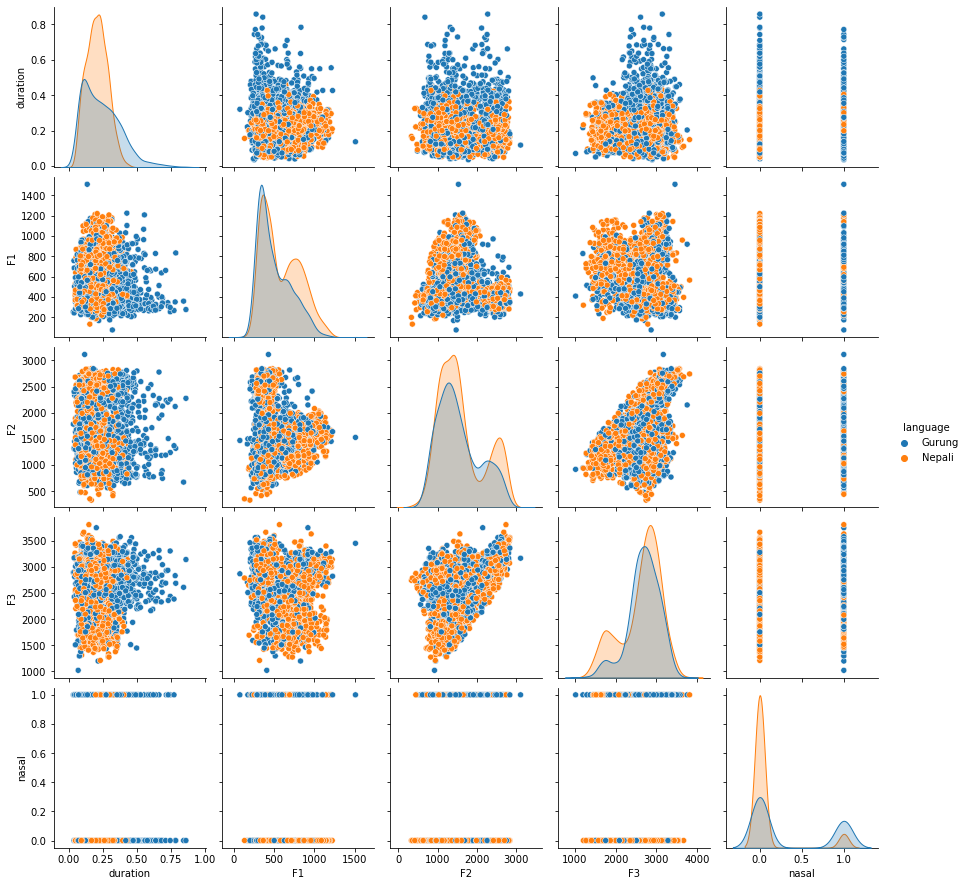

In [464]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='language');

In [465]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   language         5099 non-null   object 
 1   speaker          5099 non-null   int64  
 2   time             5099 non-null   float64
 3   word             5099 non-null   object 
 4   phoneme          5099 non-null   object 
 5   duration         5099 non-null   float64
 6   F1               5099 non-null   float64
 7   F2               5099 non-null   float64
 8   F3               5099 non-null   float64
 9   nasal            5099 non-null   int64  
 10  syllable_number  5099 non-null   int64  
 11  onset_c_place    5099 non-null   object 
 12  onset_c_manner   5099 non-null   object 
 13  laryngeal        5099 non-null   int64  
 14  coda             5099 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 597.7+ KB
